# Import data from graphQL API

In [1]:
import pandas as pd
import json

#from nltk.stem import WordNetLemmatizer
#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# Other imports
from collections import Counter
import requests
import re
from nltk.tokenize import *
from nltk.corpus import stopwords
import string
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
filename = '../text_files/bankless_votes.json'
df = json.load(open(filename))

df

[{'id': '0x319d3d6d6f84f8ca5a8de5f3abe5a3ccefce37482d03f34c9c3edf833784b78a',
  'voter': '0xE87e4F1516577359297adA62e8A33268B4220CaD',
  'created': 1650546142,
  'proposal': {'id': '0xb913117a49bfac14ab74acac83c584f881dab4615bb015d4cdb44473ee8b4b59'},
  'choice': 1,
  'space': {'id': 'banklessvault.eth'}},
 {'id': '0xea010e18e16df654af602fe57b7cfdc7eeba7e8631b87c96bbc1a41f97b3e897',
  'voter': '0xb6ac0341Fcf3FB507A8208D34a97f13779e1393D',
  'created': 1650544553,
  'proposal': {'id': '0xb913117a49bfac14ab74acac83c584f881dab4615bb015d4cdb44473ee8b4b59'},
  'choice': 1,
  'space': {'id': 'banklessvault.eth'}},
 {'id': 'QmYy7xesXsvScB2Xdww1LrJH2v78YuLqGdk4P5x6SYbxT9',
  'voter': '0xaFFc125BeDcEeB034110c1939426A3948791ef18',
  'created': 1650544474,
  'proposal': {'id': '0xb913117a49bfac14ab74acac83c584f881dab4615bb015d4cdb44473ee8b4b59'},
  'choice': 1,
  'space': {'id': 'banklessvault.eth'}},
 {'id': 'QmWazSvvHJnYJdgPcLFnwNHerEY6jd9LMnT2yNYshjZksY',
  'voter': '0x74fa01a5D0ef8039f1E14F4d

In [3]:
df = pd.DataFrame(df)
df

,id,voter,created,proposal,choice,space
0,0x319d3d6d6f84f8ca5a8de5f3abe5a3ccefce37482d03...,0xE87e4F1516577359297adA62e8A33268B4220CaD,1650546142,{'id': '0xb913117a49bfac14ab74acac83c584f881da...,1,{'id': 'banklessvault.eth'}
1,0xea010e18e16df654af602fe57b7cfdc7eeba7e8631b8...,0xb6ac0341Fcf3FB507A8208D34a97f13779e1393D,1650544553,{'id': '0xb913117a49bfac14ab74acac83c584f881da...,1,{'id': 'banklessvault.eth'}
2,QmYy7xesXsvScB2Xdww1LrJH2v78YuLqGdk4P5x6SYbxT9,0xaFFc125BeDcEeB034110c1939426A3948791ef18,1650544474,{'id': '0xb913117a49bfac14ab74acac83c584f881da...,1,{'id': 'banklessvault.eth'}
3,QmWazSvvHJnYJdgPcLFnwNHerEY6jd9LMnT2yNYshjZksY,0x74fa01a5D0ef8039f1E14F4d4C8f90e8602e07B4,1650543600,{'id': '0xb913117a49bfac14ab74acac83c584f881da...,1,{'id': 'banklessvault.eth'}
4,0x9664cdecac4ef5ee6e910779c9dfffaad3cc7cfb4d99...,0x2c074Ce167AeE79A77695768dfcf80585C8F5299,1650542618,{'id': '0xb913117a49bfac14ab74acac83c584f881da...,1,{'id': 'banklessvault.eth'}
...,...,...,...,...,...,...
12894,QmZN5FwyvkJv84oiuFfuZqS3LSjtaYvPs41rHqYEjjuUy6,0xedd049C56b804bcDBf7E704Cc312491E3D50485a,1620154858,{'id': 'QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJ...,1,{'id': 'banklessvault.eth'}
12895,QmeusGqm2uxWzTnoyfSMQXEJjCXGTTdsdiT3RqabrSZw5b,0x5C57abD3548b87Ef9bAbEa37ed3abD51fad523a3,1620154838,{'id': 'QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJ...,1,{'id': 'banklessvault.eth'}
12896,QmYqvywMgwPZXR9RzkzcShXUB6TQXxGG9zGw1Tc6y9x9w8,0x311DA6D80CC8994193168BA51B074649606cf6d2,1620154836,{'id': 'QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJ...,1,{'id': 'banklessvault.eth'}
12897,QmWnU3u72H8WgecG4HgWbruxcyd15o8qk6FkooUMLezJfj,0x716722C80757FFF31DA3F3C392A1736b7cfa3A3e,1620154835,{'id': 'QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJ...,1,{'id': 'banklessvault.eth'}


In [4]:
df.dtypes

id          object
voter       object
created      int64
proposal    object
choice      object
space       object
dtype: object

## Clean variables

In [5]:
df.proposal = df.proposal.astype('str')
df.proposal = df.proposal.str.lstrip("{'id': '")
df.proposal = df.proposal.str.rstrip("'}")

In [6]:
df.proposal

0        0xb913117a49bfac14ab74acac83c584f881dab4615bb0...
1        0xb913117a49bfac14ab74acac83c584f881dab4615bb0...
2        0xb913117a49bfac14ab74acac83c584f881dab4615bb0...
3        0xb913117a49bfac14ab74acac83c584f881dab4615bb0...
4        0xb913117a49bfac14ab74acac83c584f881dab4615bb0...
                               ...                        
12894       QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS
12895       QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS
12896       QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS
12897       QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS
12898       QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS
Name: proposal, Length: 12899, dtype: object

# Voter Insights

In [7]:
#number of proposals
df.proposal.nunique()

34

In [8]:
#number of voters
df.voter.nunique()

2900

## Votes per proposal

In [9]:
votesprop = pd.DataFrame(df.groupby('proposal')['voter'].count())
votesprop

,voter
proposal,
0x0eb29303825c37c67ddc5d71b199bbc66c149712918c2a7c9261c7f6a2953d66,272
0x1c2f7e4cce902906598be0b2c6e7b32762722d296a3f010f843fc16a9612ba39,251
0x2b1f2678546586e7e12a75e71191292999a5568d4a95bb5f0a681e7a5bfd65be,290
0x2b5159e129cef1e3aa3618f7eb4133712ad2ffb482df59159f90d7c842dc9355,272
0x33f869377c1b93a3b6db367001b6bb2604626f919ca4322960a20b8f01f58860,207
0x5f854c04a97238820aa729ab7a61797ba8f4da5ca9c592713ff7e0783a9d0913,280
0x749e887debb581c7b416376ffe12d73de3a8a304310479e0c8a2a672ef8785ca,265
0x903b96c30ac4f555c3dd598e48d5b1566f394dfa072eb6945d7c093704d1f064,360
0x98cde0a0de782f1963eb736f87ac406352154ae09cfbf0287b99b5be31ecdc8e,268


In [10]:
votesprop.shape

(34, 1)

In [11]:
votesprop = votesprop.sort_values(by='voter', ascending = False)
votesprop

,voter
proposal,
QmdoixPMMT76vSt6ewkE87JZJywS1piYsGC3nJJpcrPXKS,1353
QmSTXHWP7bjaxT9aAuoFNkaCn5Ptx7GajEDDekoBccd5Uf,752
Qmdthz7Anz7g2aJJAewNqm3gQnssP5NkS2StNKELvArQkk,650
QmbCCAH3WbAFJS4FAUTvpWGmtgbaeMh1zoKgocdt3ZJmdr,597
QmYvsZ7AU2XyhpBL8g4QRQbLRX6uU3t5CHNdFQbs5r7ypJ,588
QmQX2DQcDTZzCpM6DTVNJutQJwWXtxJDTMpBoFjbnaM9i2,558
QmYmHuawgkCZxVMo6EHq5s2WxQrSwTYZeBGRfFkc1xeW5f,535
QmWwN1CeDPLcvCVkDuBiYmaaNcRhfrUzFYhBixF2B3ntJU,523
QmXrfAHMoRcu5Vy3DsRTfokqLBTEKR6tqKVecLvkgw5NZf,509


## Participation index

In [12]:
(votesprop.voter.sum())/ 112

115.16964285714286

In [13]:
holders = pd.read_csv('../datasets/mstable/mstable_tokenholders.csv')
holders

,HolderAddress,Balance,PendingBalanceUpdate
0,0x000000000000000000000000000000000000dead,1.453216e-02,No
1,0x000000000000084e91743124a982076c59f10084,1.000000e-18,No
2,0x0000000000000eb4ec62758aae93400b3e5f7f18,8.050855e-02,No
3,0x0000000000002d534ff79e9c69e7fcc742f0be83,1.606775e-01,No
4,0x000000000000541e251335090ac5b47176af4f7e,8.919286e+02,No
...,...,...,...
9056,0xffdcedb52889c0c92b091d54d8ecca7f6371370f,1.298075e+02,No
9057,0xffe6fbf2079a0839aa88b00e982bd22282ea4ee3,2.314308e+03,No
9058,0xffe8a7999d392eda6dad614f4f885ce67d570a40,1.460834e-02,No
9059,0xfff87808e95bc582286ff711d8a1340933f6c447,1.000000e+01,No


# Proposal insights

In [14]:
filename = '../text_files/bankless_proposals.json'
df1 = json.load(open(filename))

df1

[{'id': '0xb93ef13c7f48841d50191124a6e76c3bdd099edc501b6325a495ee70db77fe5a',
  'title': 'Governance Solutions Engineer Re-implementation - Election',
  'body': "**Title:** Governance Solutions Engineer Re-implementation - Election\n**Authors:** Icedcool🏴#4947\n**Date Posted:** March 15th, 2022 12AM UTC\n**Vote Ends:** March 22nd, 2022 12AM UTC\nApplications: [Link](https://www.notion.so/bankless/BanklessDAO-Governance-Solutions-Engineers-f7a5c0a0ecb74d588d5c40f43999cc92)\nVoting Threshold: Not Applicable (Weighted Voting)\n> ⚠️The results of this election are conditional on passing the Governance Solutions Engineer Program which is concurrently being voted on Snapshot. If you have not voted for the program, please navigate to the previous page and vote there as well.\n---\n## **SUMMARY**\nAs proposed by the REVISED Governance Solutions Engineer (GSE) Program, the DAO is to elect 5 GSEs.\nThe submission period was held between February 25th and March 11th.\n\nPlease read each applicant

In [15]:
df1 = pd.DataFrame(df1)
df1

,id,title,body,choices,start,end,snapshot,state,author,space
0,0xb93ef13c7f48841d50191124a6e76c3bdd099edc501b...,Governance Solutions Engineer Re-implementatio...,**Title:** Governance Solutions Engineer Re-im...,"[mgoesdistance.eth, René, Saulthorin, 0xJustic...",1647388800,1647993600,14393704,closed,0xb6ac0341Fcf3FB507A8208D34a97f13779e1393D,"{'id': 'banklessvault.eth', 'name': 'Bankless ..."
1,0x5f854c04a97238820aa729ab7a61797ba8f4da5ca9c5...,Grants Committe Election for S4 and S5,**Title:** Grants Committe Election for S4 and...,"[paul🏴.eth#1559, montgomery#8177, FreedomFight...",1647388800,1647993600,14393222,closed,0xb6ac0341Fcf3FB507A8208D34a97f13779e1393D,"{'id': 'banklessvault.eth', 'name': 'Bankless ..."
2,0x98cde0a0de782f1963eb736f87ac406352154ae09cfb...,Governance Solution Engineer Program - Re-Impl...,**Title:** Governance Solution Engineer Progra...,"[Approve, Deny]",1647388800,1647993600,14392917,closed,0xb6ac0341Fcf3FB507A8208D34a97f13779e1393D,"{'id': 'banklessvault.eth', 'name': 'Bankless ..."
3,0x2b1f2678546586e7e12a75e71191292999a5568d4a95...,BalancerDAO’s collaboration with BanklessDAO,**Title:** BalancerDAO’s collaboration with Ba...,"[Approve, Deny]",1646676000,1647277200,14340830,closed,0xb6ac0341Fcf3FB507A8208D34a97f13779e1393D,"{'id': 'banklessvault.eth', 'name': 'Bankless ..."
4,0x1c2f7e4cce902906598be0b2c6e7b32762722d296a3f...,Tokenomics - Migrate DAO-Owned Liquidity to U...,**Proposal Name:** Tokenomics - Migrate DAO-Ow...,"[Approve, Deny]",1646442000,1647046800,14321957,closed,0xb6ac0341Fcf3FB507A8208D34a97f13779e1393D,"{'id': 'banklessvault.eth', 'name': 'Bankless ..."
5,0x903b96c30ac4f555c3dd598e48d5b1566f394dfa072e...,Quorum Removal Vote,Title: Quorum Removal Vote\nAuthors: samanthaj...,"[Approve - Remove Current Quorum, Deny - Keep ...",1645092000,1645696800,14221332,closed,0xb6ac0341Fcf3FB507A8208D34a97f13779e1393D,"{'id': 'banklessvault.eth', 'name': 'Bankless ..."
6,QmU1Rz7s87ow29QsfeCee7j2jr7H9h6BFkoPmVu6Ux56XD,BalancerDAO’s collaboration with BanklessDAO,Title: BalancerDAO’s collaboration with Bankle...,"[For, Against]",1642789800,1643394600,14050457,closed,0x47f882a155209F55D280EB36577c100A74DD32a1,"{'id': 'banklessvault.eth', 'name': 'Bankless ..."
7,0x749e887debb581c7b416376ffe12d73de3a8a3043104...,Governance Solutions Engineer Program,Title: Governance Solutions Engineer Program\n...,"[For, Needs revision]",1642707000,1643311800,14044376,closed,0xE71eFd5865A42Cb0f23146Dc8E056dBA4E67e9b7,"{'id': 'banklessvault.eth', 'name': 'Bankless ..."
8,0x33f869377c1b93a3b6db367001b6bb2604626f919ca4...,Governance Solutions Engineer Elections,Title: Governance Solutions Engineer Elections...,"[0xRene#6523, Eagle#2979, Grendel#3875, Nym#09...",1642707000,1643311800,14044338,closed,0xE71eFd5865A42Cb0f23146Dc8E056dBA4E67e9b7,"{'id': 'banklessvault.eth', 'name': 'Bankless ..."
9,0xe3f54fb37453af90984c4c41256afde75b92b8383acd...,Season 3 Project and Guild Funding,Title: Season 3 Project and Guild Funding\nPro...,"[For, Against, Abstain]",1641790800,1642395600,13974171,closed,0xb6ac0341Fcf3FB507A8208D34a97f13779e1393D,"{'id': 'banklessvault.eth', 'name': 'Bankless ..."


In [16]:
type(df1.title)

pandas.core.series.Series

## Tokenizing for topic modelling

In [17]:
def clean_tokens(text, language):
    
    from nltk.corpus import stopwords
    all_stopwords_gensim = STOPWORDS.union(set(['https', 'proposal', 'proposals', 
                                                'Proposal', 'PROPOSAL', 'dao', 'will', 'DAO', 'bank']))
    
    words = [w for w in [word for word in [w.lower() for w in word_tokenize(text)] if word.isalpha()] if not w in set(stopwords.words('english'))]
    
    return words

In [18]:
df1['clean_title'] = df1['title'].apply(lambda x: clean_tokens(x, 'english'))

In [19]:
df1['clean_body'] = df1['body'].apply(lambda x: clean_tokens(x, 'english'))

## Wordclouds

In [20]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,
    remove links,remove punctuation
    and remove words containing numbers.'''
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) #remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove urls, https
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) #get rid of digits, ie numbers
    return text

In [21]:
df1['clean_title2'] = df1['title'].apply(lambda x: clean_text(x))

In [22]:
df1['clean_body2'] = df1['body'].apply(lambda x: clean_text(x))

In [23]:
df1['tok_body'] = df1['clean_body2'].apply(lambda x:  nltk.word_tokenize(x))

In [25]:
from wordcloud import WordCloud

### Edit stopwords

In [30]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

stop_words.update(["https"])

In [31]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'https',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 

In [32]:
list_words = ["https"]

In [33]:
def text_preprocessing_updated(text, list_words):
    """
    Cleaning and parsing the text.
    """
    nopunc = clean_text(text)
    
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

    nopunc = tokenizer.tokenize(nopunc)

    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.update(list_words)
    
    
    remove_stopwords = [w for w in nopunc if w not in stop_words]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

# Topic modelling

In [34]:
import gensim
from gensim import corpora

In [35]:
dictionary = corpora.Dictionary(df1['clean_body'])
#dictionary.save('dictionary.dict')
dictionary

In [36]:
dictionary.token2id

{'across': 0,
 'allocate': 1,
 'applicable': 2,
 'applicant': 3,
 'applicants': 4,
 'applications': 5,
 'april': 6,
 'authors': 7,
 'average': 8,
 'based': 9,
 'character': 10,
 'choice': 11,
 'choices': 12,
 'concurrently': 13,
 'conditional': 14,
 'copying': 15,
 'dao': 16,
 'date': 17,
 'decisions': 18,
 'elect': 19,
 'elected': 20,
 'election': 21,
 'ends': 22,
 'engineer': 23,
 'february': 24,
 'governance': 25,
 'gse': 26,
 'gses': 27,
 'held': 28,
 'https': 29,
 'ideas': 30,
 'implications': 31,
 'joe': 32,
 'kick': 33,
 'like': 34,
 'limit': 35,
 'link': 36,
 'made': 37,
 'manuelmaccou': 38,
 'many': 39,
 'march': 40,
 'may': 41,
 'mechanic': 42,
 'navigate': 43,
 'number': 44,
 'officially': 45,
 'organize': 46,
 'page': 47,
 'passing': 48,
 'pasting': 49,
 'period': 50,
 'please': 51,
 'posted': 52,
 'power': 53,
 'prepare': 54,
 'previous': 55,
 'program': 56,
 'prohibits': 57,
 'proposed': 58,
 'qualifications': 59,
 'read': 60,
 'rené': 61,
 'response': 62,
 'results': 63,

Create corpus method

In [37]:
for item in df1['clean_body']:
    print(dictionary.doc2bow(item))

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 4), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 2), (20, 1), (21, 3), (22, 1), (23, 3), (24, 1), (25, 3), (26, 2), (27, 3), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 3), (52, 1), (53, 1), (54, 1), (55, 1), (56, 3), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 3), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 2), (83, 2), (84, 1), (85, 5), (86, 1), (87, 2), (88, 1), (89, 1)]
[(2, 2), (5, 2), (20, 1), (21, 3), (29, 3), (32, 1), (35, 2), (39, 1), (47, 1), (68, 3), (70, 1), (75, 2), (77, 1), (78, 1), (79, 1), (82, 1), (85, 4), (87, 2), (90, 1), (91, 1), (92, 1), (93, 1), (9

In [38]:
#covert into matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df1['clean_body']]

In [39]:
for word_id, count in doc_term_matrix[11]:
    print(word_id,dictionary[word_id])
    print('--------')

17 date
--------
25 governance
--------
29 https
--------
60 read
--------
62 response
--------
70 snapshot
--------
75 summary
--------
78 title
--------
82 vote
--------
85 voting
--------
103 forum
--------
104 full
--------
118 post
--------
119 quorum
--------
153 community
--------
189 feedback
--------
217 included
--------
279 requirements
--------
293 set
--------
297 specification
--------
351 champion
--------
461 proposal
--------
611 proposals
--------
639 around
--------
683 december
--------
698 draft
--------
732 frogmonkee
--------
945 education
--------
961 poll
--------
1148 olympus
--------
1176 pro
--------
1256 within
--------
1259 abide
--------
1260 firming
--------
1261 forth
--------
1262 goes
--------
1263 guidelines
--------
1264 introduces
--------
1265 parameters
--------
1266 presentation
--------
1267 recent
--------
1268 specificity
--------
1269 wording
--------


In [40]:
corpora.MmCorpus.serialize('corpus_s.mm', doc_term_matrix)

print(len(doc_term_matrix))
df1.shape

32


(32, 15)

In [41]:
Lda = gensim.models.ldamodel.LdaModel

In [42]:
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, 
               passes=50)

In [43]:
ldamodel.save('proposal_topics.model')

In [44]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel =  Lda.load('proposal_topics.model')

In [45]:
ldamodel.print_topics()

[(0,
  '0.022*"liquidity" + 0.015*"bank" + 0.012*"uniswap" + 0.012*"bond" + 0.008*"price" + 0.008*"lending" + 0.007*"tokens" + 0.007*"https" + 0.007*"bonds" + 0.006*"olympus"'),
 (1,
  '0.040*"bank" + 0.023*"bankless" + 0.021*"https" + 0.021*"dao" + 0.018*"season" + 0.012*"committee" + 0.012*"grants" + 0.011*"guild" + 0.010*"proposal" + 0.009*"liquidity"'),
 (2,
  '0.015*"https" + 0.012*"bank" + 0.011*"voting" + 0.010*"dao" + 0.010*"proposal" + 0.010*"distribution" + 0.009*"vote" + 0.009*"badge" + 0.008*"bankless" + 0.007*"snapshot"'),
 (3,
  '0.031*"balancer" + 0.022*"banklessdao" + 0.020*"liquidity" + 0.018*"dao" + 0.018*"pool" + 0.011*"usd" + 0.010*"polygon" + 0.010*"balancerdao" + 0.009*"https" + 0.009*"grant"'),
 (4,
  '0.026*"dao" + 0.013*"bank" + 0.011*"https" + 0.010*"season" + 0.010*"committee" + 0.010*"members" + 0.009*"working" + 0.008*"grants" + 0.008*"compensation" + 0.007*"coordinape"')]

In [46]:
topics = ldamodel.print_topics(num_words=5, num_topics=20)

In [47]:
for i in topics:
    print('Topic number {} \n'.format(i[0]))
    for j in i: 
        print (j)
        print('......................')

Topic number 0 

0
......................
0.022*"liquidity" + 0.015*"bank" + 0.012*"uniswap" + 0.012*"bond" + 0.008*"price"
......................
Topic number 1 

1
......................
0.040*"bank" + 0.023*"bankless" + 0.021*"https" + 0.021*"dao" + 0.018*"season"
......................
Topic number 2 

2
......................
0.015*"https" + 0.012*"bank" + 0.011*"voting" + 0.010*"dao" + 0.010*"proposal"
......................
Topic number 3 

3
......................
0.031*"balancer" + 0.022*"banklessdao" + 0.020*"liquidity" + 0.018*"dao" + 0.018*"pool"
......................
Topic number 4 

4
......................
0.026*"dao" + 0.013*"bank" + 0.011*"https" + 0.010*"season" + 0.010*"committee"
......................


In [48]:
ldamodel.show_topic(0,10)

[('liquidity', 0.021726804),
 ('bank', 0.015273672),
 ('uniswap', 0.012046102),
 ('bond', 0.01204572),
 ('price', 0.0077447267),
 ('lending', 0.007743646),
 ('tokens', 0.006669519),
 ('https', 0.0066687376),
 ('bonds', 0.006668112),
 ('olympus', 0.0055939276)]

In [49]:
first_topic_words = dict(ldamodel.show_topic(0,1000))
first_topic_words

{'liquidity': 0.021726804,
 'bank': 0.015273672,
 'uniswap': 0.012046102,
 'bond': 0.01204572,
 'price': 0.0077447267,
 'lending': 0.007743646,
 'tokens': 0.006669519,
 'https': 0.0066687376,
 'bonds': 0.006668112,
 'olympus': 0.0055939276,
 'treasury': 0.005593535,
 'market': 0.005593248,
 'position': 0.0055925953,
 'rari': 0.005592595,
 'program': 0.0045178207,
 'value': 0.0045174565,
 'revenue': 0.004517365,
 'would': 0.0045173424,
 'fees': 0.004517296,
 'oracles': 0.0045170714,
 'discount': 0.004517064,
 'dao': 0.0045159846,
 'full': 0.0034427266,
 'exchange': 0.003441987,
 'fee': 0.0034419163,
 'also': 0.0034418558,
 'sushiswap': 0.003441853,
 'future': 0.0034417731,
 'vote': 0.0034416884,
 'owned': 0.0034416635,
 'protocol': 0.0034416628,
 'capital': 0.003441626,
 'tokenomics': 0.003441621,
 'migrate': 0.0034416069,
 'bdao': 0.0034415997,
 'range': 0.003441544,
 'oracle': 0.0034415438,
 'allows': 0.003441543,
 'pool': 0.0034412632,
 'forum': 0.002366542,
 'us': 0.0023665365,
 'di

## Model visualization

In [50]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(ldamodel, doc_term_matrix, dictionary)

/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/leane/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py

In [51]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.059347 -0.073588       1        1  34.005718
1      0.019959 -0.111045       2        1  31.023308
2      0.118677  0.091366       3        1  16.356018
3     -0.166067  0.009562       4        1  13.024068
0     -0.031916  0.083705       5        1   5.590888, topic_info=            Term        Freq       Total Category  logprob  loglift
340     balancer   38.000000   38.000000  Default  30.0000  30.0000
424    liquidity   60.000000   60.000000  Default  29.0000  29.0000
343  banklessdao   59.000000   59.000000  Default  28.0000  28.0000
144         bank  177.000000  177.000000  Default  27.0000  27.0000
456         pool   25.000000   25.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
16           dao    2.214534  169.955199   Topic5  -5.4001  -1.4565
104         full    1.688233    8.153345   Topic5  -5.6715   1.3093
92          also    1.687806   13.889119   Topic5  -5.6717   0.7764
399       future    1.687766   12.299515   Topic5  -5.6718   0.8979
82          vote    1.687724   37.358824   Topic5  -5.6718  -0.2132

[312 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
324       2  0.119262  account
324       3  0.596311  account
324       4  0.238525  account
630       1  0.141792  address
630       2  0.141792  address
...     ...       ...      ...
89        2  0.339162    would
89        3  0.169581    would
89        4  0.056527    would
89        5  0.056527    would
1590      2  0.902329   writer

[502 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 1])

Wordclouds visualizations

In [52]:
first_topic_words = dict(ldamodel.show_topic(0,1000))
second_topic_words = dict(ldamodel.show_topic(1,1000))
third_topic_words = dict(ldamodel.show_topic(2,1000))
fourth_topic_words = dict(ldamodel.show_topic(3,1000))
five_topic_words = dict(ldamodel.show_topic(4,1000))

In [53]:
del first_topic_words['https']

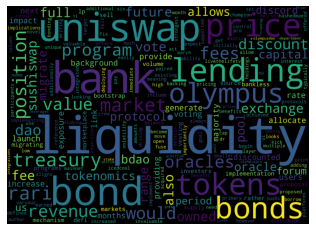

In [54]:
firstcloud = WordCloud(stopwords=STOPWORDS,
                        background_color=None,
                        width=2500,
                        height=1800
                         ).generate_from_frequencies(first_topic_words)
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

In [55]:
del second_topic_words ['bank']

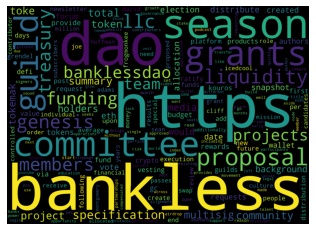

In [56]:
cloud = WordCloud(stopwords=STOPWORDS,
                          background_color=None,
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(second_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [57]:
del third_topic_words['https']

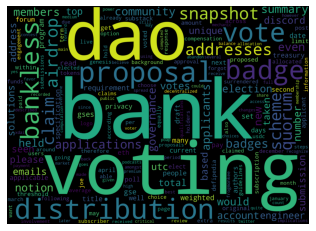

In [58]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(third_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [59]:
del fourth_topic_words['bank']
del fourth_topic_words['bankless']

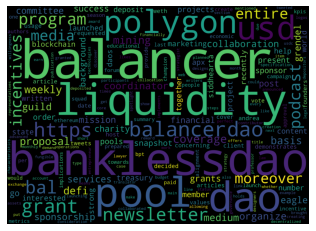

In [60]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(fourth_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

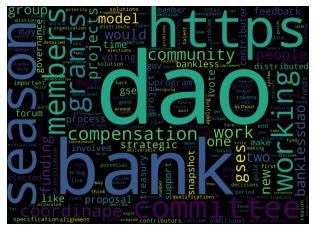

In [61]:
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate_from_frequencies(five_topic_words)
plt.imshow(cloud)
plt.axis('off')
plt.show()

## Model evaluation

In [68]:
import importlib

In [69]:
print('\nPerplexity: ', ldamodel.log_perplexity(doc_term_matrix))  


Perplexity:  -6.983585850656434
